# Imports

In [1]:
import numpy as np
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt

from src.algorithms import AbstractMetropolisHastings

figsize(20, 3)

# VMC

The goal of this section is to calculate $\int ... dR $

$$
\left \{
\begin{array}{rll}
H &= - \frac{\partial^2}{2 \partial x^2} +V(x) & \text{Hamiltonian}\\
\psi(R) &= \exp({-p_0(x-p_1)^2-p_2(x-p_3)^2}) & \text{Wave function}\\
E_L(R) &= \frac{H\psi(R)}{\psi(R)} = V(x) - \frac{1}{2}\frac{\partial^2}{\partial x^2}\psi(x) & \text{"Local" energy}\\
V(x) &= \frac{a_2}{2}x^2 + a_4x^4 & \text{Potential energy}\\
G(R,R', \beta) &= \braket{R | e^{- \beta H} | R'} & \text{???}\\
\Pi(R) &\propto | \psi(R) |^2 & \text{Sampling probability???}\\
\end{array}
\right .
$$

In [2]:
class VMC(AbstractMetropolisHastings[float]):
    a = [1, 0]
    p = [.0002, 0, 0, 0]
    sigma = 5

    def generator_function(self):
        return self.current_configuration + np.random.normal(0, self.sigma)

    def state_likelihood(self, x: float):
        # This is proportional to the state probability
        p = self.p
        aux_exp = lambda mu, sigma: np.prod([-1, mu, x - sigma, x - sigma])
        return np.exp(aux_exp(p[0], p[1]) + aux_exp(p[2], p[3]))


In [3]:
vmc = VMC(initial_configuration=10 ** 2)

## Likelihood plot

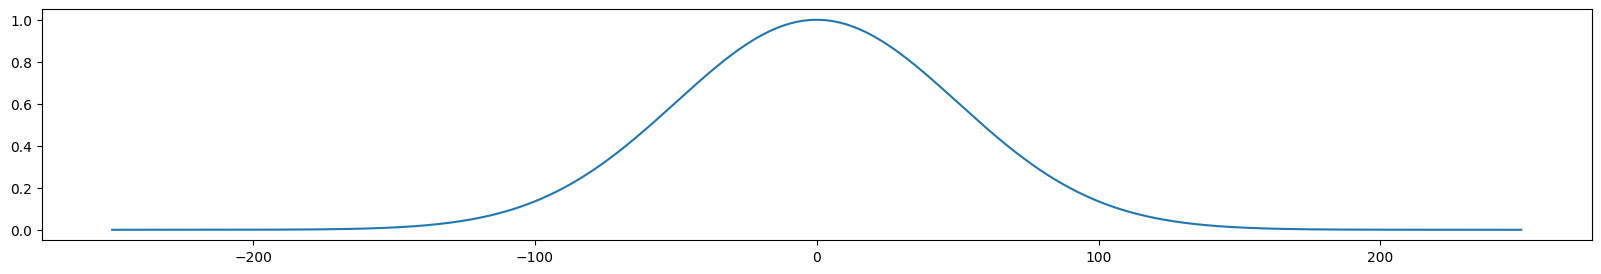

In [4]:
datapoints = np.linspace(-250, 250, 10000)
plt.plot(datapoints, [vmc.state_likelihood(x) for x in datapoints])

## Trial run

In [5]:
vmc.run_iterations(10 ** 7)

Rejected 3.2%: 100%|██████████| 10000000/10000000 [04:57<00:00, 33558.71it/s]


## Plot

(array([2.00000e+00, 2.00000e+00, 1.10000e+01, 1.00000e+01, 2.30000e+01,
        4.40000e+01, 5.50000e+01, 8.30000e+01, 9.90000e+01, 1.10000e+02,
        2.12000e+02, 2.66000e+02, 4.47000e+02, 5.58000e+02, 7.89000e+02,
        1.05000e+03, 1.34600e+03, 1.77300e+03, 2.57900e+03, 3.47200e+03,
        4.57300e+03, 5.49500e+03, 7.35800e+03, 9.44500e+03, 1.22630e+04,
        1.57560e+04, 2.01290e+04, 2.53620e+04, 3.16540e+04, 3.87940e+04,
        4.73130e+04, 5.68620e+04, 6.81640e+04, 8.18590e+04, 9.64320e+04,
        1.13855e+05, 1.32052e+05, 1.52030e+05, 1.72274e+05, 1.94017e+05,
        2.16754e+05, 2.40671e+05, 2.62102e+05, 2.85076e+05, 3.08188e+05,
        3.28066e+05, 3.46419e+05, 3.62990e+05, 3.77449e+05, 3.87581e+05,
        3.93484e+05, 3.95208e+05, 3.92012e+05, 3.84918e+05, 3.75681e+05,
        3.62321e+05, 3.44489e+05, 3.26234e+05, 3.06276e+05, 2.83580e+05,
        2.59896e+05, 2.39319e+05, 2.15460e+05, 1.93165e+05, 1.70900e+05,
        1.51020e+05, 1.31787e+05, 1.14375e+05, 9.79

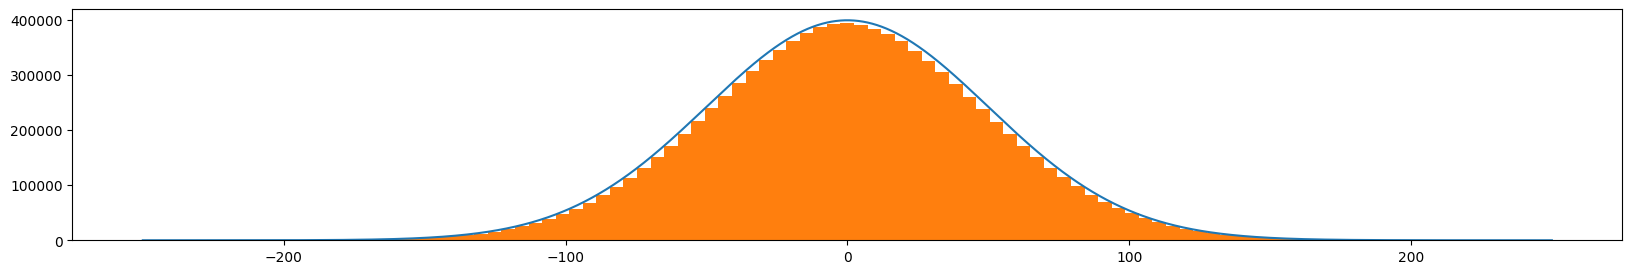

In [6]:
plt.plot(datapoints, [4 * 10 ** 5 * vmc.state_likelihood(x) for x in datapoints])
plt.hist(vmc.configuration_history, bins=100, density=False)